## Advanced Classification Project

 ### Lesego Tiro

<a id="cont"></a>

## Table of Contents

<a href=#one1>1. introduction</a>

<a href=#onei>2. Problem statement</a>

<a href=#one>3. Importing Packages</a>


<a href=#two>4. Loading Data</a>

<a href=#three>5. Exploratory Data Analysis (EDA)</a>

<a href=#four>6. Data Engineering</a>


<a href=#five>7. Modelling</a>

<a href=#six>8. Model Perfomance</a>

<a href=#seven>9. Model Explanations</a>

<a href=#threefiv>10. kaggle Submissions</a>



### Honor Code

I {Lesego Tiro}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the EDSA honour code.

Non-compliance with the honour code constitutes a material breach of contract

<a id="one1"></a>
## 1. Introduction

<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

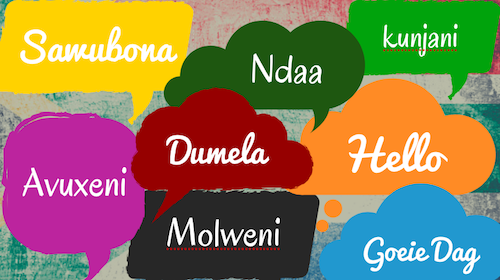

South Africa is a multicultural society that is characterised by its rich linguistic diversity. Language is an indispensable tool that can be used to deepen democracy and also contribute to the social, cultural, intellectual, economic and political life of the South African society.

The country is multilingual with 11 official languages, each of which is guaranteed equal status. Most South Africans are multilingual and able to speak at least two or more of the official languages.

<a id="onei"></a>
## 2.  Problem Statement

<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

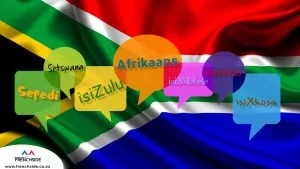

The project is to design and build a model that can take text as an input and return the SA language the text was written.
you will take text which is in any of South Africa's 11 Official languages and identify which language the text is in. This is an example of NLP's Language Identification, the task of determining the natural language that a piece of text is written in.

The provided data is a kaggle dataset consisting of 2 features, namely:

- Text (written in one of the 9 South African Languages)
- lang_id (A unique pneumonic that represents a language)



 <a id="one"></a>
## 3. Importing Packages
<a href=#cont>Back to Table of Contents</a>

In [46]:
# utilities
import re
import numpy as np
import pandas as pd
import string
import urllib
import matplotlib.pyplot as plt
# plotting
import seaborn as sns
#from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, TreebankWordTokenizer

# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import ComplementNB
# Libraries from Sklearn
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_extraction.text import CountVectorizer
##from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from comet_ml import Experiment

<a id="two"></a>
## 4. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In [50]:
# Load the train and test data

df_train = pd.read_csv('train_set.csv')
df_test= pd.read_csv('test_set.csv')

In [3]:
df_train.head(10)

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...
5,nso,dinyakišišo tše tša go dirwa gabedi ka ngwaga ...
6,tsn,kgetse nngwe le nngwe e e sa faposiwang mo tsh...
7,ven,mbadelo dze dza laelwa dzi do kwama mahatulele...
8,nso,maloko a dikhuduthamaga a ikarabela mongwe le ...
9,tsn,fa le dirisiwa lebone le tshwanetse go bontsha...


In [4]:
df_test.head(10)

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.
5,6,"Ke feela dilense tše hlakilego, tša pono e tee..."
6,7,<fn>(762010101403 AM) 1495 Final Gems Birthing...
7,8,Ntjhafatso ya konteraka ya mosebetsi: Etsa bon...
8,9,u-GEMS uhlinzeka ngezinzuzo zemithi yezifo ezi...
9,10,"So, on occasion, are statistics misused."


<a id="three"></a>
## 5. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

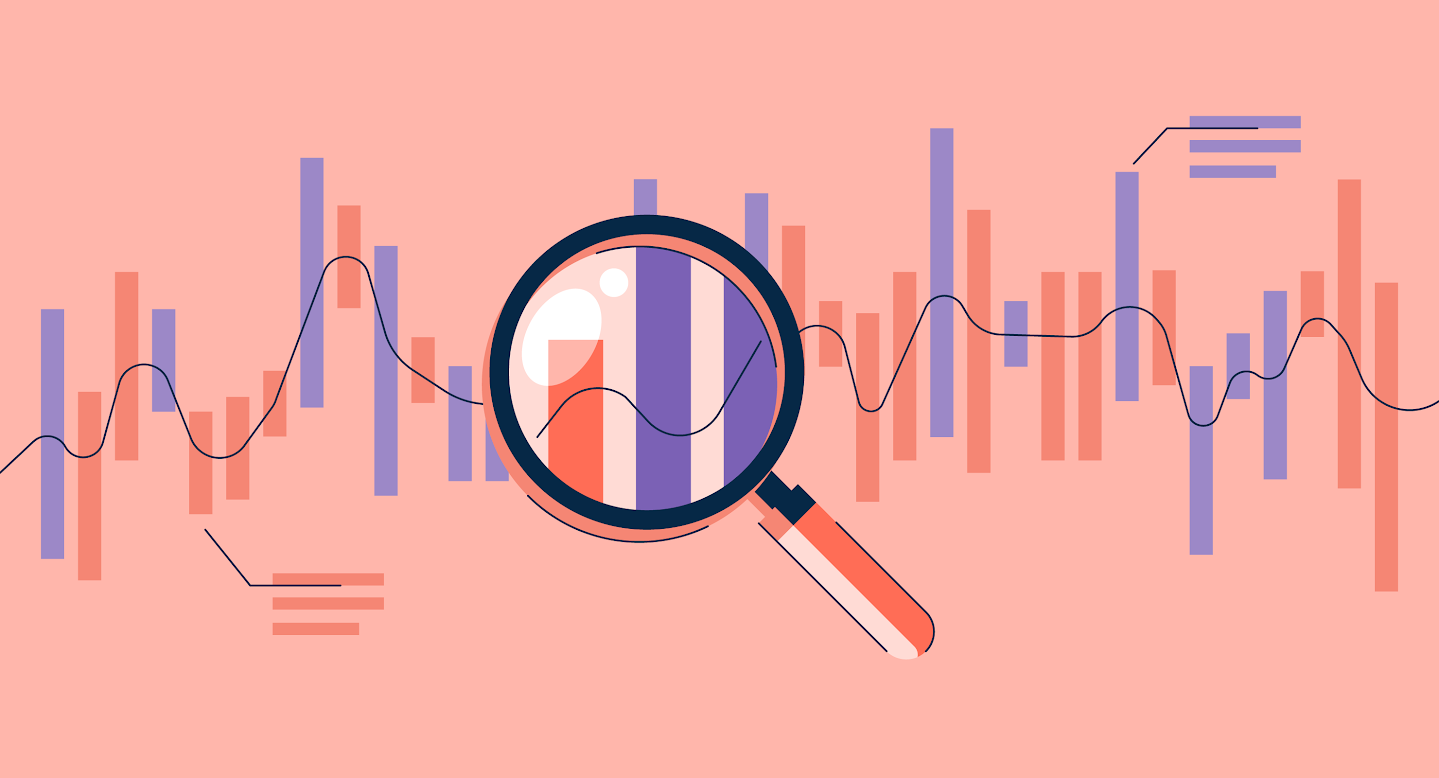

Exploratory data analysis (EDA) is used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods. It helps determine how best to manipulate data sources to get the answers you need, making it easier for data scientists to discover patterns, spot anomalies, test a hypothesis, or check assumptions.

EDA is primarily used to see what data can reveal beyond the formal modeling or hypothesis testing task and provides a better understanding of data set variables and the relationships between them

In [28]:
# Columns of the dataset
df_train.columns

Index(['lang_id', 'text'], dtype='object')

These are the features that make up the dataset.

In [29]:
# Shape of data Set
df_train.shape

(33000, 2)

There are 33000 observations in the dataset across 2 features. 

In [30]:
# total number of entries in dataset
df_train.size

66000

The dataframe consists of 47457 entries.

In [232]:
#unique values in columns
df_train.nunique()

lang_id       11
text       29948
dtype: int64

This is the the number of unique values present in each of the two columns that makeup the dataset

In [32]:
#Data information
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


The concise summary of the data shows the features in our dataframe, also the number of columns that are not empty and the data types.

The result shows we have no non-null values, this will be further explored to confirm in details.

We have 2 of the columns to be of type objects

The dataset runs on 515.8+ KB kb of the system memory.

In [33]:
# Nullvalues present in each column
df_train.isnull().sum()

lang_id    0
text       0
dtype: int64

As represented above there are no missing values in any of the 2 features of the dataset, which means there will not be any neccesary entity replacement in data engineering.

In [66]:
df_train["lang_id"].value_counts()

xho    3000
eng    3000
nso    3000
ven    3000
tsn    3000
nbl    3000
zul    3000
ssw    3000
tso    3000
sot    3000
afr    3000
Name: lang_id, dtype: int64

This illustrate the number of times each of the languages apear in the Dataset

Text(0, 0.5, 'Frequency')

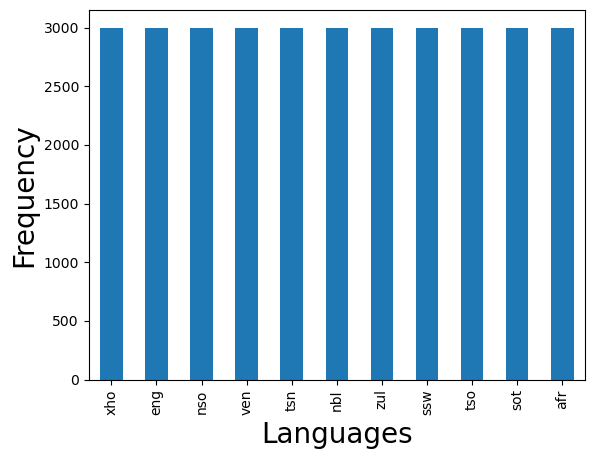

In [236]:
df_train['lang_id'].value_counts().plot(kind='bar')
plt.xlabel('Languages', fontsize=20)
plt.ylabel('Frequency', fontsize=20)

The histogram shows that the distibution of the languages is Equal.

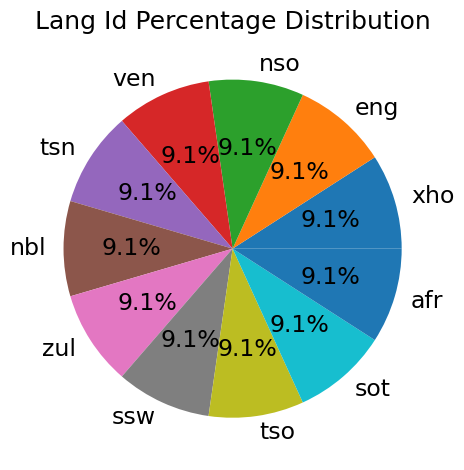

In [45]:
# Visualising the percentage distribution of sentiments
plt.pie(df_train.lang_id.value_counts().values, 
        labels = df_train.lang_id.value_counts().index, 
        autopct = '%2.1f%%', textprops={'fontsize': 17})
plt.title('Language Id Percentage Distribution', fontsize=18)
plt.tight_layout()
plt.show()

All the languages contribute evenly to the whole percentage of the the dataset. The dataset is balanced. 

<a id="four"></a>
## 6. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

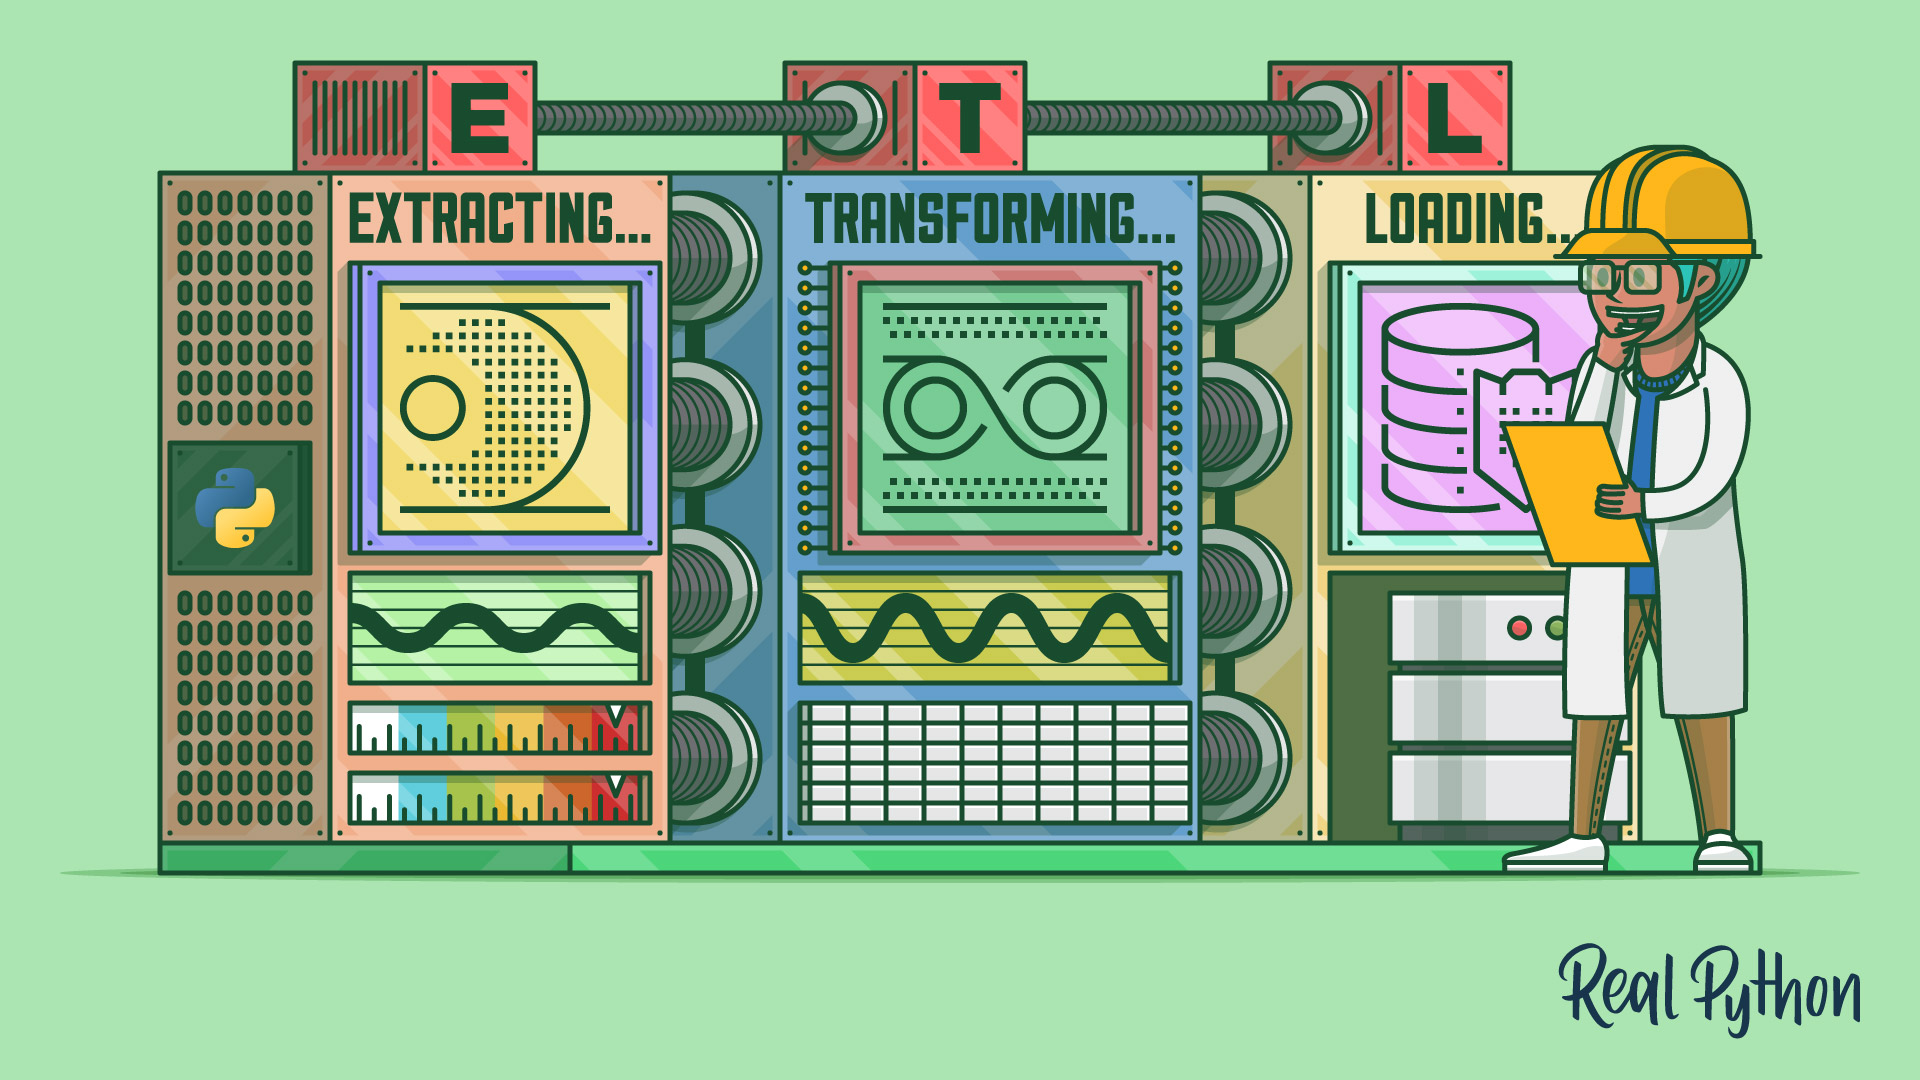

Data engineering helps make data more useful and accessible for consumers of data. To do so, data engineering must source, transform and analyze data from each system. It refers to the building of systems to enable the collection and usage of data. This data is usually used to enable subsequent analysis and data science; which often involves machine learning

**Text Cleaning**
- Removing Noise
- Tokenisation
- Stemming
- Lemmatisation
- Stop Words
- Text Feature Extraction
- n-grams

### Pre-Processing 

In [51]:
#convert all the text lower case to remove some noise from capitalisation.
df_train['text'] = df_train['text'].str.lower()

In [52]:
# remove the punctuation 
def remove_punctuation(post):
    return ''.join([l for l in post if l not in string.punctuation])

In [53]:
df_train['text'] = df_train['text'].apply(remove_punctuation)

In [54]:
#lower strings
def clean_num(text):
    re.sub(r'http\S+', '', text)
    re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = text.lower()
    return text

In [55]:
df_train['text'] = df_train['text'].apply(clean_num)

In [56]:
df_train.head()

,lang_id,text
0,xho,umgaqosiseko wenza amalungiselelo kumaziko axh...
1,xho,idha iya kuba nobulumko bokubeka umsebenzi nap...
2,eng,the province of kwazulunatal department of tra...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [57]:
#applying tokenization to the data set
tokeniser = TreebankWordTokenizer()
df_train['text'] = df_train['text'].apply(tokeniser.tokenize)

In [58]:
#applying the lemmatizer
lemmatizer = WordNetLemmatizer()
def extract_lemma(words, lemmatizer):
    return ' '.join([lemmatizer.lemmatize(word) for word in words])

In [59]:
df_train['text'] = df_train['text'].apply(extract_lemma, args=(lemmatizer, ))

In [60]:
#using countVectorizer
vectorizer = CountVectorizer(lowercase=True, stop_words='english', analyzer='word', ngram_range=(1, 1))

<a id="five"></a>
## 7. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

### Predicting Test Data

In [61]:
X=df_train['text']
y=df_train['lang_id'] 

In [69]:
# Test datset
Xtest = df_test['text']

In [70]:
#We then vectorize of test data 
count_vec = CountVectorizer(min_df=1,max_df=0.9,ngram_range=(1, 2))
X_vec = count_vec.fit_transform(X)
test_vec = count_vec.transform(Xtest)

In [71]:
test_vec.shape

(5682, 711932)

In [72]:
# split data to Train/Test set
X_train, X_test, y_train, y_test= train_test_split(X_vec, y, test_size=0.2, random_state=42)

**Training the BernoulliNB**

In [73]:
BernNB = BernoulliNB(alpha=1.0)
BernNB.fit(X_train, y_train)
print(BernNB)

y_acc = y_test
y_pred = BernNB.predict(X_test)
print('F1 score is:', accuracy_score(y_acc, y_pred))

BernoulliNB()
F1 score is: 0.9986363636363637


**Training the MultinomialNB Model**

In [74]:
model = MultinomialNB(alpha=0.01,fit_prior=True, class_prior=None)
model.fit(X_train, y_train)
print(model)

y_acc = y_test
y_pred = model.predict(X_test)
print('F1 score is:', accuracy_score(y_acc, y_pred))

MultinomialNB(alpha=0.01)
F1 score is: 0.9986363636363637


In [75]:
comp = ComplementNB(alpha=0.01)
comp.fit(X_train, y_train)
print(print)

y_acc = y_test
y_pred_comp = comp.predict(X_test)
print(accuracy_score(y_acc, y_pred))

<built-in function print>
0.9986363636363637


In [76]:
sc = StackingClassifier(estimators =[('COMPLEMENT', comp),('MultinomialNB', model),
                                    ('Bernoulli', BernNB)],
    final_estimator= model,
    n_jobs=-1,
    passthrough=True)

In [77]:
test_vec.shape

(5682, 711932)

<a id="six"></a>
## 8. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

### F1-Score

F1-score is a measure of a model's accuracy on a dataset. It elegantly sums up the predictive performance of a model by combining two otherwise competing metrics — precision and recall.It simply measures the percentage of correct predictions that a machine learning model has made. A good F1 score means that you have low false positives and low false negatives. An F1 score is considered perfect when it's 1 , while the model is a total failure when it's 0.

In [12]:
sc.fit(X_train,y_train)
y_pred = sc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       583
         eng       1.00      1.00      1.00       615
         nbl       0.99      1.00      1.00       583
         nso       1.00      1.00      1.00       625
         sot       1.00      1.00      1.00       618
         ssw       1.00      1.00      1.00       584
         tsn       1.00      1.00      1.00       598
         tso       1.00      1.00      1.00       561
         ven       1.00      1.00      1.00       634
         xho       1.00      1.00      1.00       609
         zul       1.00      0.99      1.00       590

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600



In [17]:
f1_score(y_acc, y_pred,average='micro')


0.9987878787878788

<a id="seven"></a>
## 9. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>



### Naive-Bayes MultiNomial NB

Naive-Bayes MultiNominal NB: Naïve Bayes — a probabilistic approach for constructing the data classification models. It’s formulated as several methods, widely used as an alternative to the distance-based K-Means clustering and decision tree forests, and deals with probability as the “likelihood” that data belongs to a specific class. The Gaussian and Multinomial models of the naïve Bayes exist. The multinomial model provides an ability to classify data, that cannot be represented numerically. Its main advantage is the significantly reduced complexity. It provides an ability to perform the classification, using small training sets, not requiring to be continuously re-trained.(Arthur v. 2021)

### Support Vector Machines

Support Vector Machines: The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points. To separate the two classes of data points, there are many possible hyperplanes that could be chosen. Our objective is to find a plane that has the maximum margin, i.e the maximum distance between data points of both classes. Maximizing the margin distance provides some reinforcement so that future data points can be classified with more confidence (Rohith Gandhi 2018).
Hyperplanes are decision boundaries that help classify the data points. Data points falling on either side of the hyperplane can be attributed to different classes. Also, the dimension of the hyperplane depends upon the number of features. If the number of input features is 2, then the hyperplane is just a line. If the number of input features is 3, then the hyperplane becomes a two-dimensional plane. It becomes difficult to imagine when the number of features exceeds 3.
structure.

### Random Forest Classifier

Random Forest Classifier: Random forests is a supervised learning algorithm. It can be used both for classification and regression. It is also the most flexible and easy to use algorithm. A forest is comprised of trees. It is said that the more trees it has, the more robust a forest is. Random forests creates decision trees on randomly selected data samples, gets prediction from each tree and selects the best solution by means of voting. It also provides a pretty good indicator of the feature importance.

It works in four steps:

Select random samples from a given dataset.

Construct a decision tree for each sample and get a prediction result from each decision tree.

Perform a vote for each predicted result.

Select the prediction result with the most votes as the final prediction.

<a id="threefiv"></a>

## 10. kaggle submission
<a class="anchor" id="1.1"></a>
<a href=#cont> Back to Table of Contents </a><a id="threefiv"></a>

In [68]:
#test = pd.read_csv('test_set.csv')

#_df = pd.DataFrame(test['index'])
#_df['lang_id'] = BernNB.predict(test_vec)
#_df.to_csv('submission_9.csv', index=False)

In [79]:
# Converting the prediction to DataFrame
preds=BernNB.predict(test_vec)
d1=pd.DataFrame(preds, columns=["lang_id"])
d1.head()

,lang_id
0,tsn
1,nbl
2,ven
3,ssw
4,nbl


In [80]:
d_2 = pd.DataFrame({"index": df_test["index"]})
d1_submission = d_2.join(d1)
d1_submission.head(2)

,index,lang_id
0,1,tsn
1,2,nbl


In [81]:
d1_submission.to_csv('submission2_.csv', index=False)